In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import scipy.stats as stats

In [2]:
df = pd.read_csv('data1.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,cost
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,220.0464
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,512.3580
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,7.7486
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,1340.6085
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,19.8516
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Standard Class,Corporate,United States,Philadelphia,Pennsylvania,19134,East,Technology,Accessories,258.6960,3,0.20,194.0220
1219,Standard Class,Corporate,United States,Philadelphia,Pennsylvania,19134,East,Technology,Phones,1931.9580,7,0.40,2318.3496
1220,Standard Class,Home Office,United States,Los Angeles,California,90036,West,Office Supplies,Storage,249.7500,9,0.00,204.7950
1221,Standard Class,Home Office,United States,Los Angeles,California,90036,West,Technology,Phones,255.9360,8,0.20,227.1432


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     1223 non-null   object 
 1   Segment       1223 non-null   object 
 2   Country       1223 non-null   object 
 3   City          1223 non-null   object 
 4   State         1223 non-null   object 
 5   Postal Code   1223 non-null   int64  
 6   Region        1223 non-null   object 
 7   Category      1223 non-null   object 
 8   Sub-Category  1223 non-null   object 
 9   Sales         1223 non-null   float64
 10  Quantity      1223 non-null   int64  
 11  Discount      1223 non-null   float64
 12  cost          1223 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 124.3+ KB


In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
cost            0
dtype: int64

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df['Profit'] = (df['Sales'] - df['cost'])

df['Profit_discount'] = ((df['Profit'] - df['Discount']))

df['Discount_percentage'] = (df['Discount'] / df['Sales']) * 100

df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,cost,Profit,Profit_discount,Discount_percentage
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,220.0464,41.9136,41.9136,0.000000
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,512.3580,219.5820,219.5820,0.000000
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,7.7486,6.8714,6.8714,0.000000
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,1340.6085,-383.0310,-383.4810,0.046994
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,19.8516,2.5164,2.3164,0.894134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Standard Class,Corporate,United States,Philadelphia,Pennsylvania,19134,East,Technology,Accessories,258.6960,3,0.20,194.0220,64.6740,64.4740,0.077311
1219,Standard Class,Corporate,United States,Philadelphia,Pennsylvania,19134,East,Technology,Phones,1931.9580,7,0.40,2318.3496,-386.3916,-386.7916,0.020704
1220,Standard Class,Home Office,United States,Los Angeles,California,90036,West,Office Supplies,Storage,249.7500,9,0.00,204.7950,44.9550,44.9550,0.000000
1221,Standard Class,Home Office,United States,Los Angeles,California,90036,West,Technology,Phones,255.9360,8,0.20,227.1432,28.7928,28.5928,0.078145


In [7]:
pd.DataFrame(df.nunique())

,0
Ship Mode,4
Segment,3
Country,1
City,198
State,41
Postal Code,249
Region,4
Category,3
Sub-Category,17
Sales,1088


In [8]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()

df['Ship Mode_']= label_encoder.fit_transform(df['Ship Mode'])
  
df['Ship Mode_'].unique()

array([2, 3, 0, 1])

In [9]:
label_encoder = preprocessing.LabelEncoder()

df['Segment_']= label_encoder.fit_transform(df['Segment'])
  
df['Segment_'].unique()

array([0, 1, 2])

In [10]:
label_encoder = preprocessing.LabelEncoder()

df['Country_']= label_encoder.fit_transform(df['Country'])
  
df['Country_'].unique()

array([0])

In [11]:
label_encoder = preprocessing.LabelEncoder()

df['City_']= label_encoder.fit_transform(df['City'])
  
df['City_'].unique()

array([ 73, 101,  57,  33, 172,  58, 104, 192, 167,  60, 141, 133,  77,
       148, 121, 108,  47, 194,  44, 122, 125, 181,  26,  63, 174,  82,
       109,  40,  46,  31, 151, 113, 144, 160,  10,  24, 134, 184,  32,
        17, 196,  13, 142, 155,  80, 138, 126,  59, 171, 168,  48,  21,
       165, 115,  53,  65, 146,  70, 193,   0,  41,  38, 195, 159, 107,
        45,  43, 176, 170,  89, 166,  16,  23, 117,  27,  81, 175,  30,
        12, 177,  90,   5,   6,  69, 162,  99,  74, 119,  96,  11, 103,
       105,  71, 182, 145, 139,  42, 140,  94, 189, 111,  78, 149, 102,
        95,  20, 124,  62,  83,   9, 127, 136,   2,  98,  79,  55,  35,
       137,   8,  64,  66,  88, 116, 110,  67,   3, 106, 163,  93,  68,
        39, 188, 185, 114, 152, 143, 173, 186,  28, 183,  19, 191,  25,
        22, 135, 118,  75, 130,  52, 180,  36,  15,  91,   7,  87, 132,
        49, 169, 112,  56, 100,  97, 164, 123,  61, 128,   1, 178,  54,
       150, 179, 157,  14, 187, 120, 131, 190,  84, 161, 153,  1

In [12]:
label_encoder = preprocessing.LabelEncoder()

df['State_']= label_encoder.fit_transform(df['State'])

df['State_'].unique()

array([13,  3,  8, 28, 39, 36, 40, 37, 22, 32, 10, 18, 17,  6, 11, 27,  1,
       38, 35,  0, 34, 31,  4, 12, 29, 20, 30, 26, 14,  5, 25, 16,  9, 23,
       33, 19,  2, 21, 24, 15,  7])

In [13]:
label_encoder = preprocessing.LabelEncoder()

df['Region_']= label_encoder.fit_transform(df['Region'])
  
df['Region_'].unique()

array([2, 3, 0, 1])

In [14]:
label_encoder = preprocessing.LabelEncoder()

df['Category_']= label_encoder.fit_transform(df['Category'])
  
df['Category_'].unique()

array([0, 1, 2])

In [15]:
label_encoder = preprocessing.LabelEncoder()

df['Sub-Category_']= label_encoder.fit_transform(df['Sub-Category'])
  
df['Sub-Category_'].unique()

array([ 4,  5, 10, 16, 14,  9,  2, 13,  3,  1, 12,  0,  7,  8, 15, 11,  6])

In [16]:
df = df[['Ship Mode', 'Ship Mode_', 'Segment', 'Segment_', 'City', 'City_','Country', 'Country_',
        'State', 'State_', 'Postal Code', 'Region', 'Region_','Category', 'Category_',
         'Sub-Category', 'Sub-Category_', 'Sales', 'Quantity', 'Discount', 'cost', 'Profit', 'Profit_discount', 'Discount_percentage']]
df

,Ship Mode,Ship Mode_,Segment,Segment_,City,City_,Country,Country_,State,State_,...,Category_,Sub-Category,Sub-Category_,Sales,Quantity,Discount,cost,Profit,Profit_discount,Discount_percentage
0,Second Class,2,Consumer,0,Henderson,73,United States,0,Kentucky,13,...,0,Bookcases,4,261.9600,2,0.00,220.0464,41.9136,41.9136,0.000000
1,Second Class,2,Consumer,0,Henderson,73,United States,0,Kentucky,13,...,0,Chairs,5,731.9400,3,0.00,512.3580,219.5820,219.5820,0.000000
2,Second Class,2,Corporate,1,Los Angeles,101,United States,0,California,3,...,1,Labels,10,14.6200,2,0.00,7.7486,6.8714,6.8714,0.000000
3,Standard Class,3,Consumer,0,Fort Lauderdale,57,United States,0,Florida,8,...,0,Tables,16,957.5775,5,0.45,1340.6085,-383.0310,-383.4810,0.046994
4,Standard Class,3,Consumer,0,Fort Lauderdale,57,United States,0,Florida,8,...,1,Storage,14,22.3680,2,0.20,19.8516,2.5164,2.3164,0.894134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Standard Class,3,Corporate,1,Philadelphia,141,United States,0,Pennsylvania,32,...,2,Accessories,0,258.6960,3,0.20,194.0220,64.6740,64.4740,0.077311
1219,Standard Class,3,Corporate,1,Philadelphia,141,United States,0,Pennsylvania,32,...,2,Phones,13,1931.9580,7,0.40,2318.3496,-386.3916,-386.7916,0.020704
1220,Standard Class,3,Home Office,2,Los Angeles,101,United States,0,California,3,...,1,Storage,14,249.7500,9,0.00,204.7950,44.9550,44.9550,0.000000
1221,Standard Class,3,Home Office,2,Los Angeles,101,United States,0,California,3,...,2,Phones,13,255.9360,8,0.20,227.1432,28.7928,28.5928,0.078145


In [21]:
#for i in range (1):
    temp = df.loc[(df['City_'] == i )]
    name = str(temp['City'].unique())+ ".csv"
     temp.to_csv(name)

IndentationError: unexpected indent (1934932763.py, line 2)

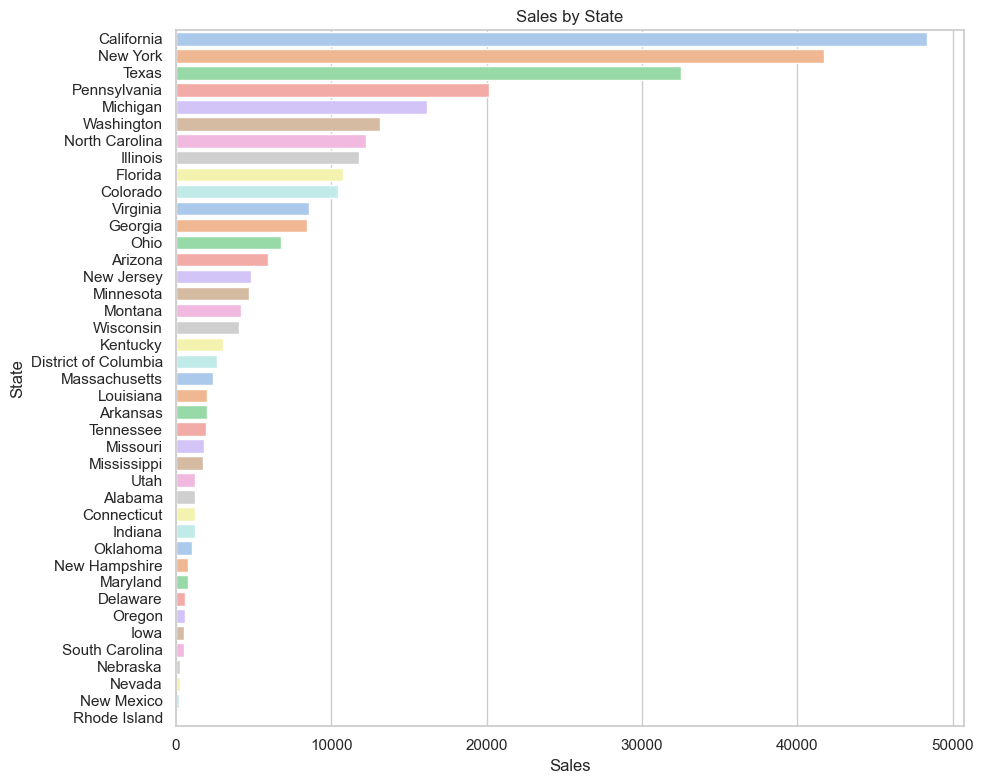

In [17]:
sales_by_state = df.groupby('State')['Sales'].sum().reset_index()

sales_by_state = sales_by_state.sort_values('Sales', ascending=False)

sns.set(style='whitegrid')

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Sales', y='State', data=sales_by_state, palette='pastel')
plt.xlabel('Sales')
plt.ylabel('State')
plt.title('Sales by State')

plt.tight_layout()
plt.show()

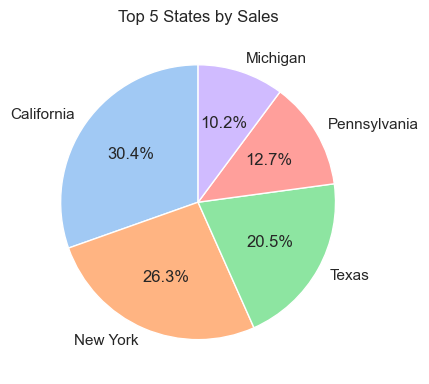

In [18]:
N = 5
sales_by_state = df.groupby('State')['Sales'].sum().reset_index()

sales_by_state = sales_by_state.sort_values('Sales', ascending=False)

top_states = sales_by_state.head(N)

sales_percentage = top_states['Sales'] / top_states['Sales'].sum() * 100

sns.set(style='whitegrid')

plt.figure(figsize = (8, 4))
colors = sns.color_palette('pastel')[0:N]
plt.pie(sales_percentage, labels=top_states['State'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title(f'Top {N} States by Sales')

plt.tight_layout()
plt.show()

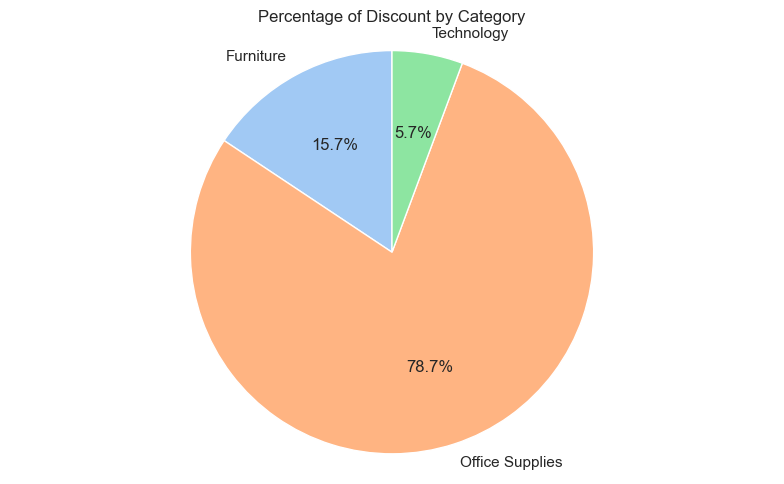

In [19]:
discounts_by_category = df.groupby('Category')['Discount_percentage'].mean()

plt.figure(figsize=(8,5))
colors = sns.color_palette('pastel')[0:len(discounts_by_category)]
plt.pie(discounts_by_category, labels=discounts_by_category.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Percentage of Discount by Category')

plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

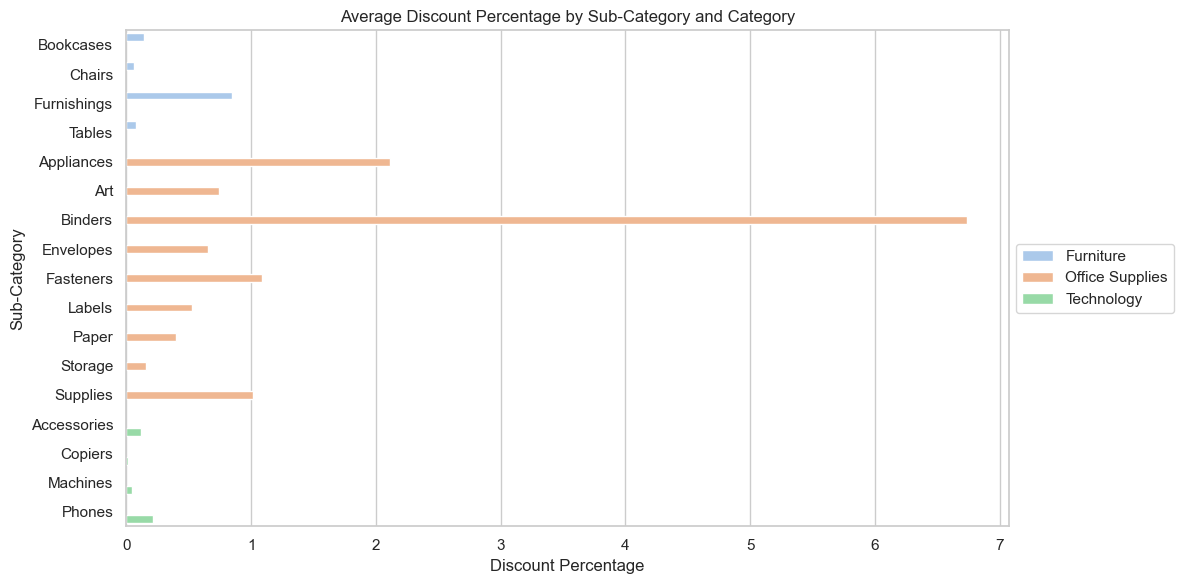

In [20]:
discount_percentage_by_category_subcategory = df.groupby(['Category', 'Sub-Category'])['Discount_percentage'].mean().reset_index()

plt.figure(figsize = (8, 4))
sns.set(style='whitegrid')
colors = sns.color_palette('pastel')

plt.figure(figsize=(12, 6))
chart = sns.barplot(x='Discount_percentage', y='Sub-Category', hue='Category', data=discount_percentage_by_category_subcategory, palette=colors)
plt.xlabel('Discount Percentage')
plt.ylabel('Sub-Category')
plt.title('Average Discount Percentage by Sub-Category and Category')

chart.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

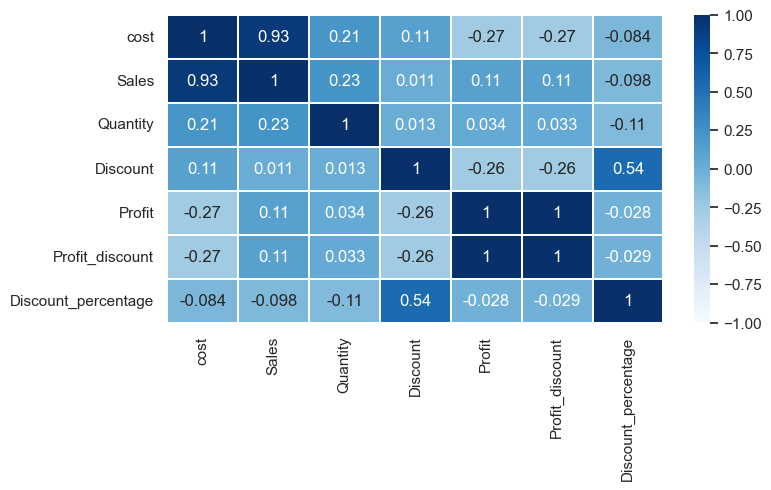

In [21]:
correlation = df[['cost','Sales','Quantity','Discount','Profit','Profit_discount', 'Discount_percentage']].corr()

plt.figure(figsize = (8, 4))

sns.heatmap(correlation, vmin=-1, vmax=1, cmap="Blues", annot=True, linewidth = 0.1 )

plt.show()

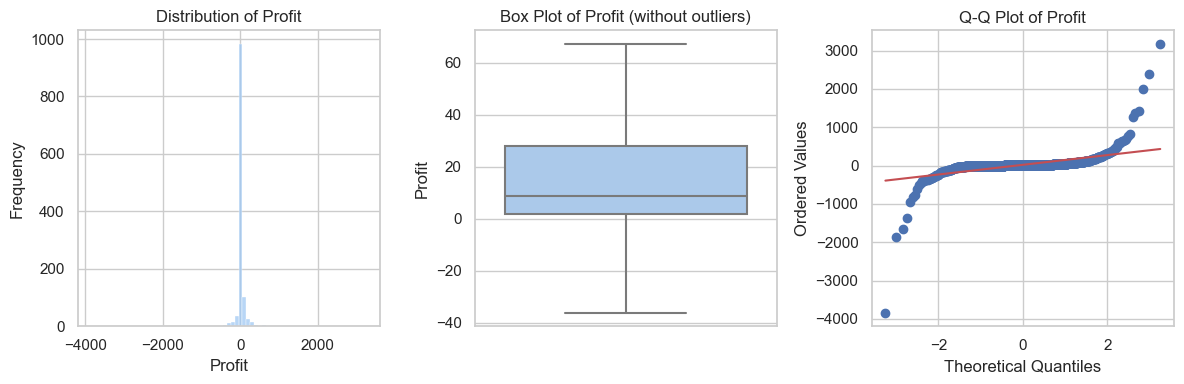

In [22]:
plt.figure(figsize=(12, 4))
sns.set_palette("pastel")

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Profit', binwidth=100)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='Profit', showfliers=False)
plt.ylabel('Profit')
plt.title('Box Plot of Profit (without outliers)')

plt.subplot(1, 3, 3)
stats.probplot(df['Profit'], dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Q-Q Plot of Profit')

plt.tight_layout()
plt.show()


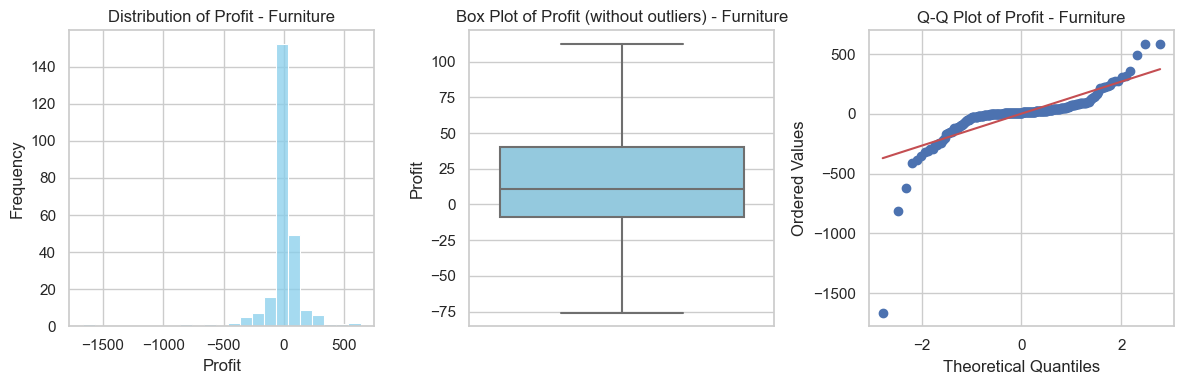

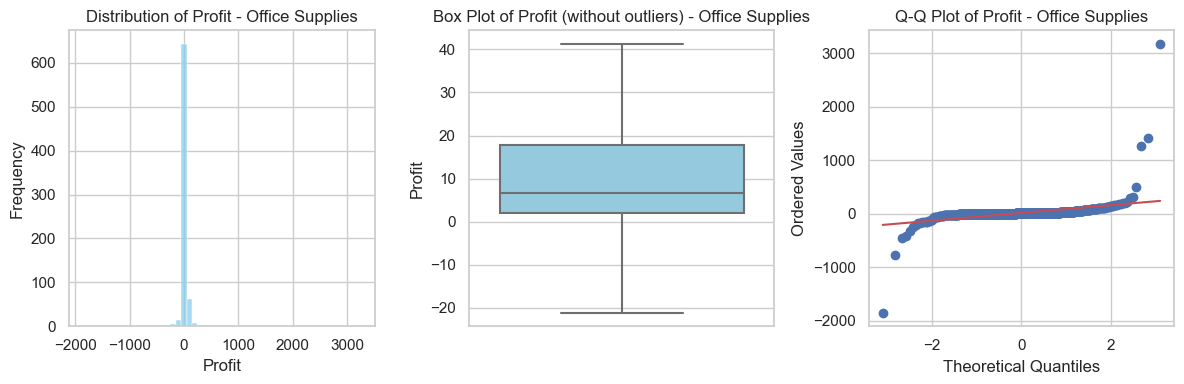

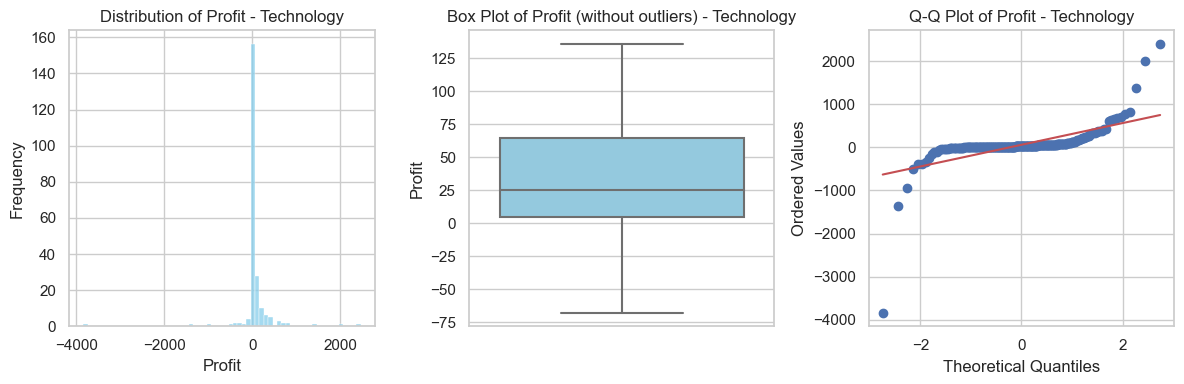

In [23]:
categories = ['Furniture', 'Office Supplies', 'Technology']

for category in categories:
    category_df = df[df['Category'] == category]
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    sns.histplot(data=category_df, x='Profit', binwidth=100, color='skyblue')
    plt.xlabel('Profit')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Profit - {category}')
    
    plt.subplot(1, 3, 2)
    sns.boxplot(data=category_df, y='Profit', color='skyblue', showfliers=False)
    plt.ylabel('Profit')
    plt.title(f'Box Plot of Profit (without outliers) - {category}')
    
    plt.subplot(1, 3, 3)
    stats.probplot(category_df['Profit'], dist='norm', plot=plt)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    plt.title(f'Q-Q Plot of Profit - {category}')
    
    plt.tight_layout()
    plt.show()


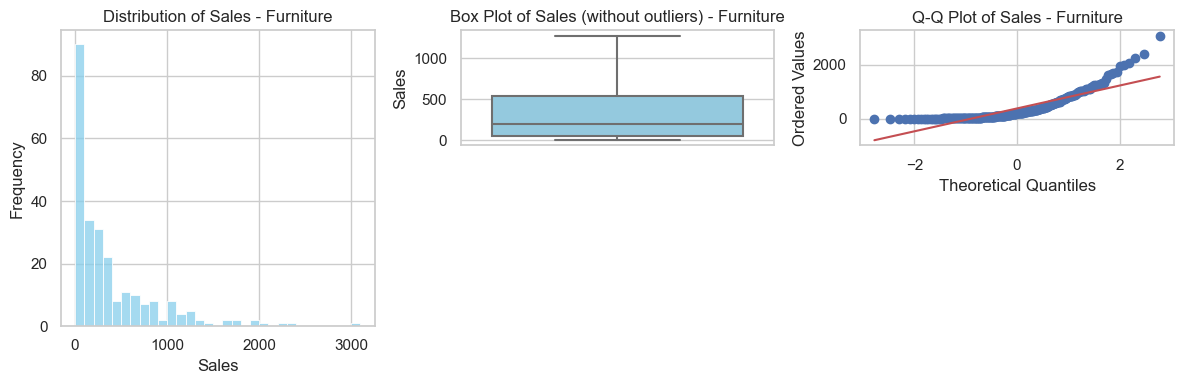

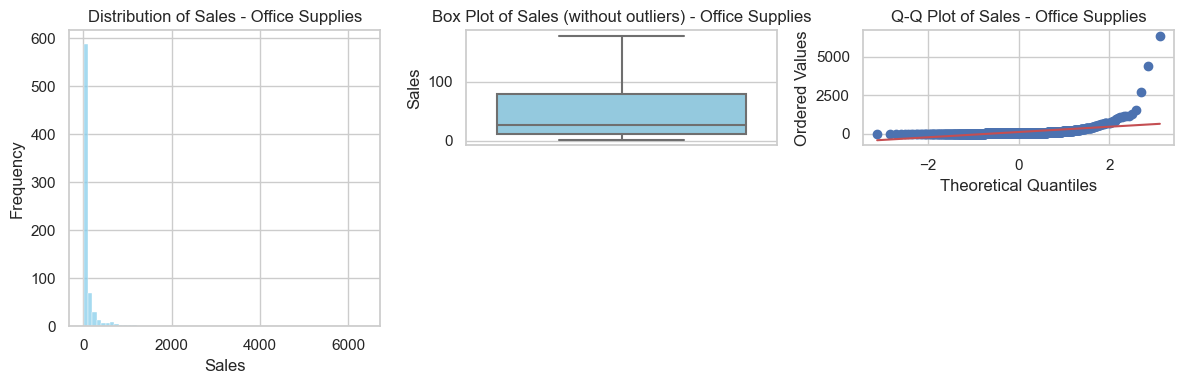

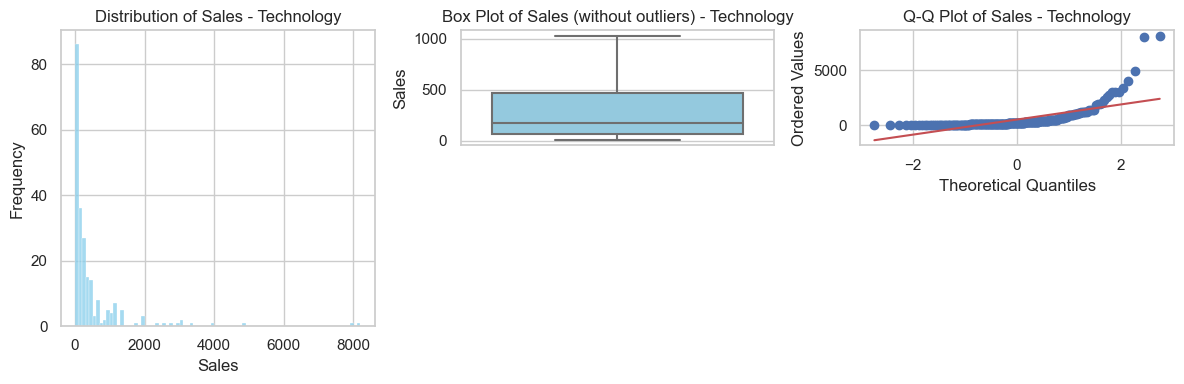

In [24]:
categories = ['Furniture', 'Office Supplies', 'Technology']

for category in categories:
    category_df = df[df['Category'] == category]


    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    sns.histplot(data=category_df, x='Sales', binwidth=100, color='skyblue')
    plt.xlabel('Sales')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Sales - {category}')
    
    plt.subplot(2, 3, 2)
    sns.boxplot(data=category_df, y='Sales', color='skyblue', showfliers=False)
    plt.ylabel('Sales')
    plt.title(f'Box Plot of Sales (without outliers) - {category}')
    
    plt.subplot(2, 3, 3)
    stats.probplot(category_df['Sales'], dist='norm', plot=plt)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    plt.title(f'Q-Q Plot of Sales - {category}')
    
    plt.tight_layout()
    plt.show()

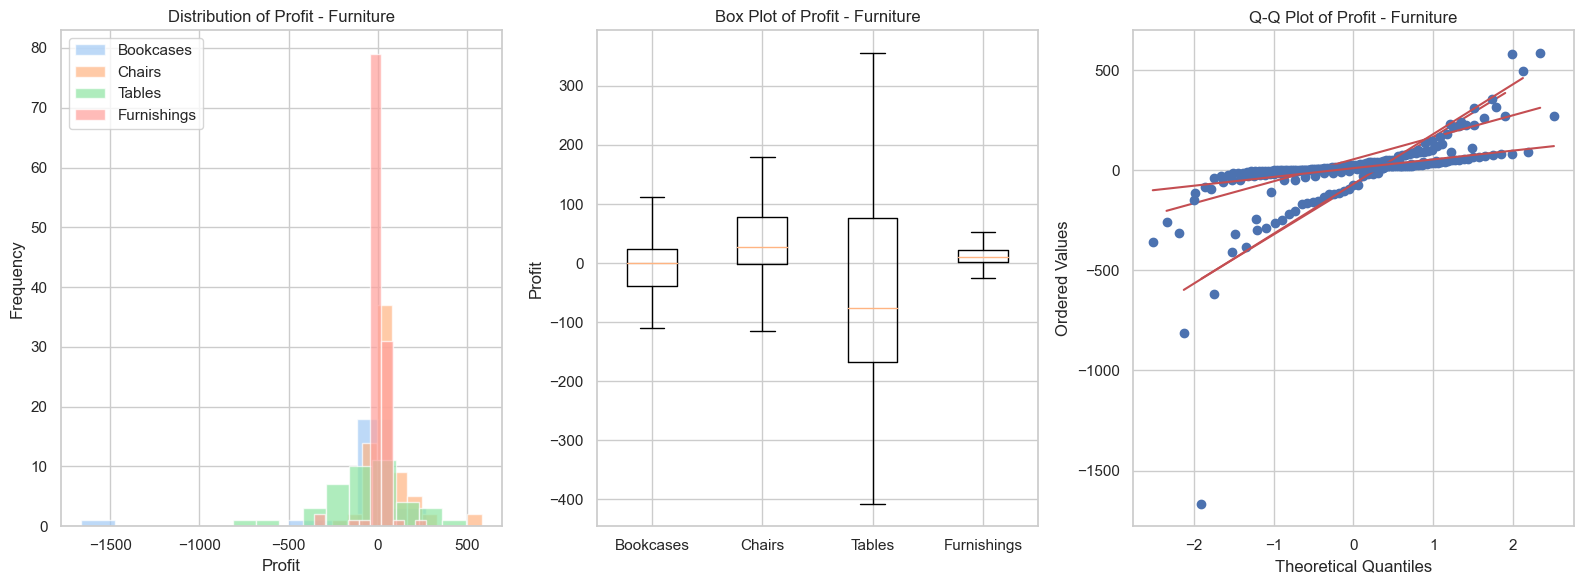

In [70]:
category_data = df[df['Category'] == 'Furniture']

subcategories = category_data['Sub-Category'].unique()

plt.figure(figsize=(16, 6))


plt.subplot(1, 3, 1)
for subcategory in subcategories:
    subcategory_data = category_data[category_data['Sub-Category'] == subcategory]
    plt.hist(subcategory_data['Profit'], bins=10, alpha=0.7, label=subcategory)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit - Furniture')
plt.legend()


plt.subplot(1, 3, 2)
boxplot_data = [category_data[category_data['Sub-Category'] == subcategory]['Profit'] for subcategory in subcategories]
plt.boxplot(boxplot_data, labels=subcategories, showfliers=False)
plt.ylabel('Profit')
plt.title('Box Plot of Profit - Furniture')


plt.subplot(1, 3, 3)
for subcategory in subcategories:
    subcategory_data = category_data[category_data['Sub-Category'] == subcategory]
    stats.probplot(subcategory_data['Profit'], dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Q-Q Plot of Profit - Furniture')

plt.tight_layout()

plt.show()

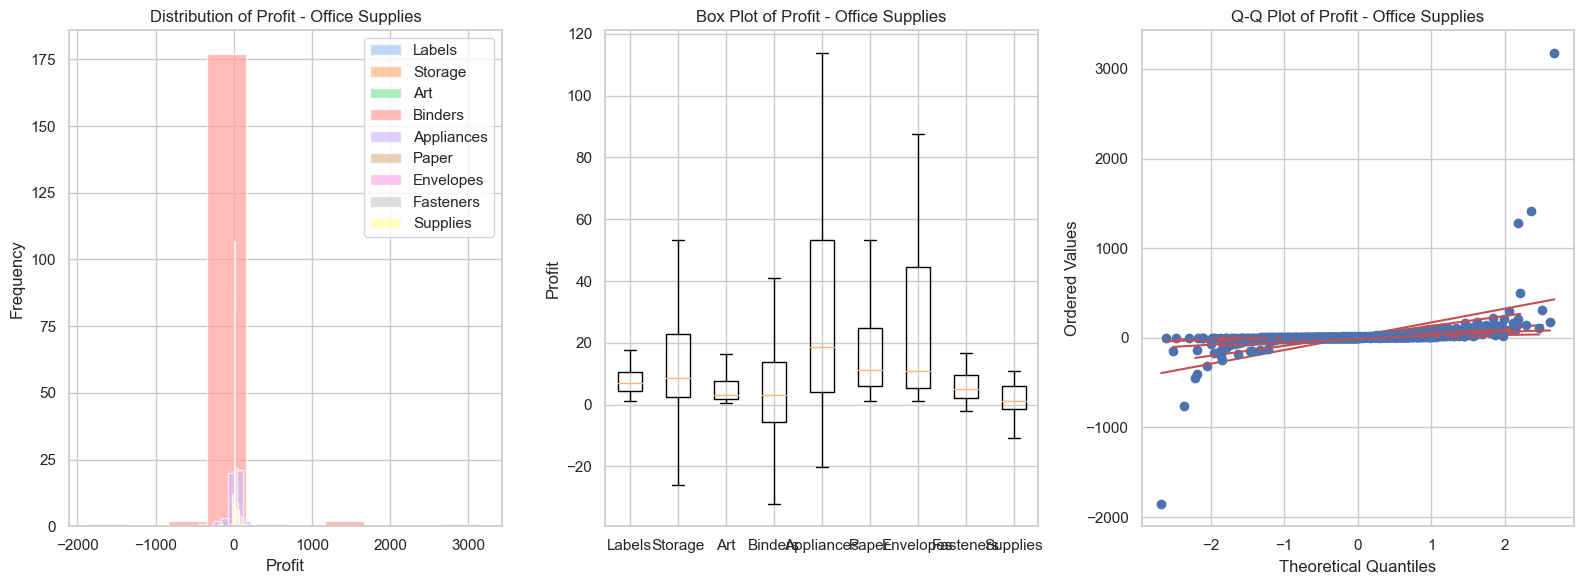

In [85]:
category_data = df[df['Category'] == 'Office Supplies']

subcategories = category_data['Sub-Category'].unique()

plt.figure(figsize=(16, 6))


plt.subplot(1, 3, 1)
for subcategory in subcategories:
    subcategory_data = category_data[category_data['Sub-Category'] == subcategory]
    plt.hist(subcategory_data['Profit'], bins=10, alpha=0.7, label=subcategory)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit - Office Supplies')
plt.legend()


plt.subplot(1, 3, 2)
boxplot_data = [category_data[category_data['Sub-Category'] == subcategory]['Profit'] for subcategory in subcategories]
plt.boxplot(boxplot_data, labels=subcategories, showfliers=False)
plt.ylabel('Profit')
plt.title('Box Plot of Profit - Office Supplies')


plt.subplot(1, 3, 3)
for subcategory in subcategories:
    subcategory_data = category_data[category_data['Sub-Category'] == subcategory]
    stats.probplot(subcategory_data['Profit'], dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Q-Q Plot of Profit - Office Supplies')

plt.tight_layout()

plt.show()

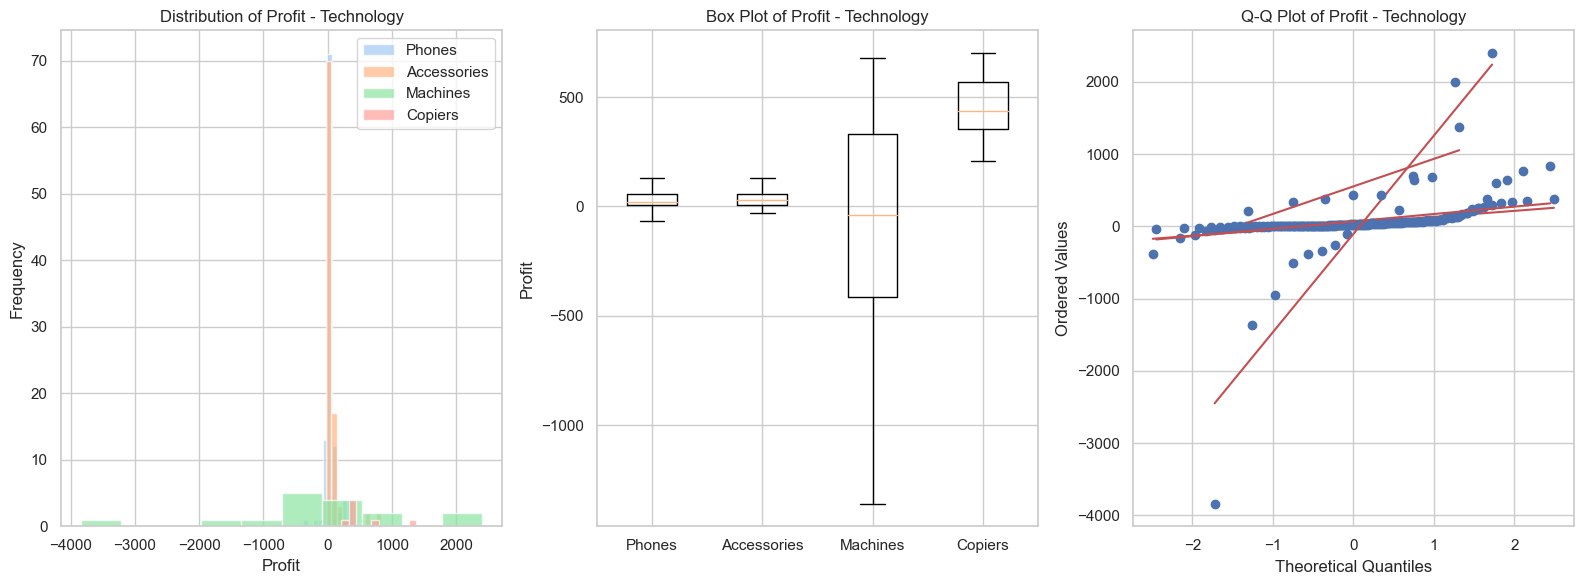

In [84]:
category_data = df[df['Category'] == 'Technology']

subcategories = category_data['Sub-Category'].unique()

plt.figure(figsize=(16, 6))


plt.subplot(1, 3, 1)
for subcategory in subcategories:
    subcategory_data = category_data[category_data['Sub-Category'] == subcategory]
    plt.hist(subcategory_data['Profit'], bins=10, alpha=0.7, label=subcategory)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit - Technology')
plt.legend()


plt.subplot(1, 3, 2)
boxplot_data = [category_data[category_data['Sub-Category'] == subcategory]['Profit'] for subcategory in subcategories]
plt.boxplot(boxplot_data, labels=subcategories, showfliers=False)
plt.ylabel('Profit')
plt.title('Box Plot of Profit - Technology')


plt.subplot(1, 3, 3)
for subcategory in subcategories:
    subcategory_data = category_data[category_data['Sub-Category'] == subcategory]
    stats.probplot(subcategory_data['Profit'], dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Q-Q Plot of Profit - Technology')

plt.tight_layout()

plt.show()

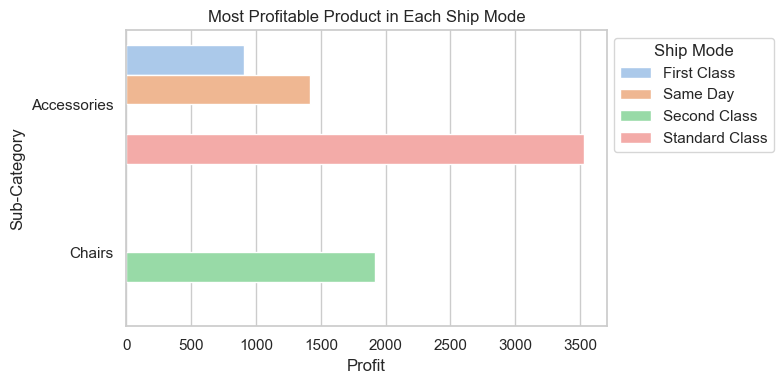

In [95]:
profit_by_ship_subcat = df.groupby(['Ship Mode', 'Sub-Category'])['Profit'].sum().reset_index()

max_profit_subcat = profit_by_ship_subcat.groupby('Ship Mode')['Profit'].idxmax()
most_profitable = profit_by_ship_subcat.loc[max_profit_subcat]

plt.figure(figsize=(8, 4))
sns.barplot(data=most_profitable, x='Profit', y='Sub-Category', hue='Ship Mode', palette='pastel')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.title('Most Profitable Product in Each Ship Mode')
plt.legend(title='Ship Mode', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

chart.legend(title='Ship Mode', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

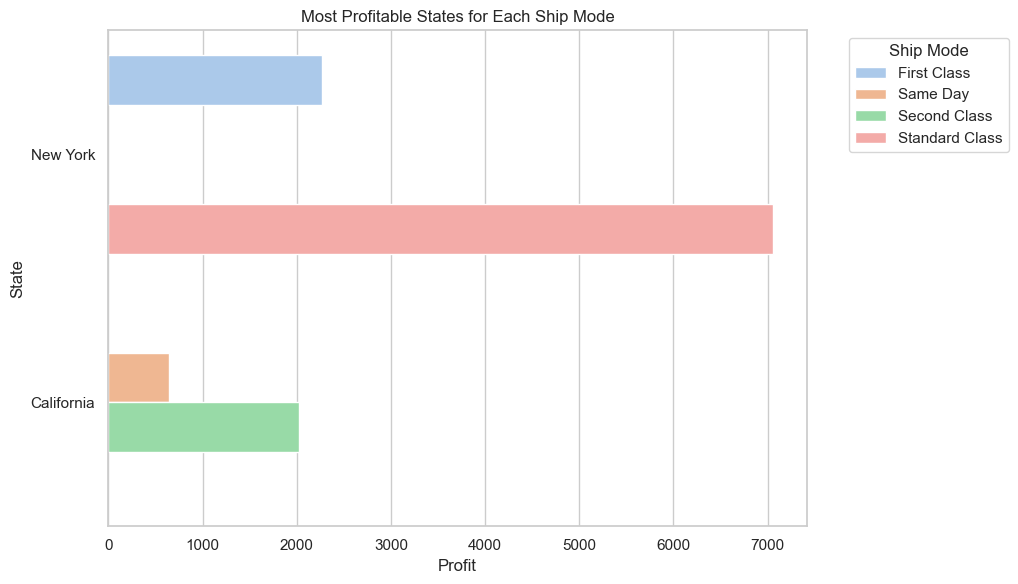

In [97]:
profit_by_ship_state = df.groupby(['Ship Mode', 'State'])['Profit'].sum().reset_index()


max_profit_state = profit_by_ship_state.groupby('Ship Mode')['Profit'].idxmax()
most_profitable = profit_by_ship_state.loc[max_profit_state]

plt.figure(figsize=(10, 6))
chart = sns.barplot(data=most_profitable, x='Profit', y='State', hue='Ship Mode', palette='pastel')
plt.xlabel('Profit')
plt.ylabel('State')
plt.title('Most Profitable States for Each Ship Mode')
plt.legend(title='Ship Mode', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

chart.legend(title='Ship Mode', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()